Importing data from a csv file

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Hackathon_data.csv')


Cleaning the data

In [4]:

new = df['Elevation Interval of Screen(masl)'].str.split(" - ", n=1, expand = True) #Split the screen interval into a top and bottom, in a new DataFrame

df['Screen Top(masl)'] = new[0] #Create new columns in the original data 
df['Screen Bot(masl)'] = new[1] 


df['Date'] = df['Date'].str[3:] #Change date from dd-mm-yy to mm-yy

df = df.set_index(['Well name'])

df = df[df['Corrected Groundwater Surface Elevation(masl)'].str[0] != "<"] #Delete all gw elevation data starting with "<"
      
df.head()


,Date,Ground Elevation(masl),Datum Elevation(masl),Surveyed Stickup(m),Total Depth of Piezometer(mbgs),Bottom of Piezometer Elevation(masl),Depth Interval of Screen(mbgs),Elevation Interval of Screen(masl),Depth Interval of Sand(mbgs),Elevation Interval of Sand(masl),...,Corrected Depth to Groundwater(mbtoc),Corrected Depth to Groundwater(mbgs),Observed Groundwater Surface Elevation(masl),Corrected Groundwater Surface Elevation(masl),Depth to Bottom of Well(mbtoc),Measured Stick up(m),Easting(m),Northing(m),Screen Top(masl),Screen Bot(masl)
Well name,,,,,,,,,,,,,,,,,,,,,
43629,Jun-16,953.5,954.39,0.88,7.8,945.7,4.80 - 7.80,948.70 - 945.70,NaN,NaN,...,8.2,7.32,946.19,946.19,8.69,N/M,645463.505,5867925.859,948.70,945.70
43629,Oct-16,953.5,954.39,0.88,7.8,945.7,4.80 - 7.80,948.70 - 945.70,NaN,NaN,...,6.39,5.51,948,948,N/M,N/M,645463.505,5867925.859,948.70,945.70
43629,May-17,953.5,954.39,0.88,7.8,945.7,4.80 - 7.80,948.70 - 945.70,NaN,NaN,...,6.42,5.54,947.97,947.97,N/M,N/M,645463.505,5867925.859,948.70,945.70
43629,Oct-17,953.5,954.39,0.88,7.8,945.7,4.80 - 7.80,948.70 - 945.70,NaN,NaN,...,6.94,6.06,947.45,947.45,8.7,N/M,645463.505,5867925.859,948.70,945.70
43629,May-18,953.5,954.39,0.88,7.8,945.7,4.80 - 7.80,948.70 - 945.70,NaN,NaN,...,7.62,6.74,946.77,946.77,8.7,N/M,645463.505,5867925.859,948.70,945.70


Narrowing down the data to a single date and relevant columns only

In [5]:

df = df[df['Date']=='Jun-16'] #For a select constant date, gather all well information

#Clean dataframe to selected columns
df = df[['Date', 'Corrected Groundwater Surface Elevation(masl)', 'Easting(m)','Northing(m)','Screen Top(masl)','Screen Bot(masl)']]

#Change type of Screen Top and Base to numeric
df['Screen Top(masl)'] = pd.to_numeric(df['Screen Top(masl)'])
df['Screen Bot(masl)'] = pd.to_numeric(df['Screen Bot(masl)'])

#Add screen midpoint
df['Screen Mid(masl)'] = (df['Screen Top(masl)'] + df['Screen Bot(masl)'])/2

df.head()


,Date,Corrected Groundwater Surface Elevation(masl),Easting(m),Northing(m),Screen Top(masl),Screen Bot(masl),Screen Mid(masl)
Well name,,,,,,,
43629,Jun-16,946.19,645463.505,5867925.859,948.70,945.70,947.200
TH7,Jun-16,946.85,645461.893,5867883.754,946.21,945.36,945.785
35217,Jun-16,948.82,645617.050,5867782.746,948.80,945.80,947.300
35401,Jun-16,947.27,645466.248,5867809.039,947.82,944.82,946.320
97-21,Jun-16,947.19,645608.630,5867740.071,947.14,943.14,945.140


# Clustering

On to clustering..

In [6]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
# Select data to use for clustering
X = df.iloc[:,2:7]
print(X.head())

### we need to scale the data
X = StandardScaler().fit_transform(X)

           Easting(m)  Northing(m)  Screen Top(masl)  Screen Bot(masl)  \
Well name                                                                
43629      645463.505  5867925.859            948.70            945.70   
TH7        645461.893  5867883.754            946.21            945.36   
35217      645617.050  5867782.746            948.80            945.80   
35401      645466.248  5867809.039            947.82            944.82   
97-21      645608.630  5867740.071            947.14            943.14   

           Screen Mid(masl)  
Well name                    
43629               947.200  
TH7                 945.785  
35217               947.300  
35401               946.320  
97-21               945.140  


K-means clustering

In [8]:
### K-means clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("Label:", kmeans.labels_)


print("Cluster centers", kmeans.cluster_centers_)

### evaluate the error of the clustering 
y_pred = kmeans.labels_
# find the X's for one cluster 
result1 = np.nonzero(y_pred == 0) 
C1 = X[result1]

result2 = np.nonzero(y_pred == 1) 
C2 = X[result2]

result3 = np.nonzero(y_pred == 2) 
C3 = X[result3]


# calculate the covariance of midpoint --> .  need to change the column number!!!!!!!!!
cov_C1=np.cov(C1[:,-1])
cov_C2=np.cov(C2[:,-1])
cov_C3=np.cov(C3[:,-1])

print('covariance of cluster 1:',cov_C1)
print('covariance of cluster 2:',cov_C2)
print('covariance of cluster 3:',cov_C3)

mean_kmeans = (cov_C1+cov_C2+cov_C3)/3

print('mean of the covariances',mean_kmeans)

Label: [2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0]
Cluster centers [[ 0.15125299  0.68606493 -1.50038218 -1.4703363  -1.48900362]
 [-0.77138126 -0.99898794 -0.29133572 -0.34496811 -0.31853992]
 [ 0.32481757  0.24387229  0.6844013   0.69994167  0.69367668]]
covariance of cluster 1: 0.5457107653255034
covariance of cluster 2: 0.2646892289562191
covariance of cluster 3: 0.211512153655219
mean of the covariances 0.3406373826456472


In [9]:
#### DBSCAN


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=1).fit(X)

labels = db.labels_

n_clusters_ = len(set(labels))

n_clusters_
cov_list = []

# find the X's for one cluster

for i in range(0,n_clusters_):
    
    result = np.nonzero(y_pred == i) 
    C = X[result]
    a = np.cov(C[:,2])
    cov_list.append(a)
    print('covariance of cluster',i,':',np.cov(C[:,-1]))

cov_list

mean_db = sum(cov_list) / len(cov_list)

print('mean of the covariances',mean_db)



covariance of cluster 0 : 0.5457107653255034
covariance of cluster 1 : 0.2646892289562191
mean of the covariances 0.4015384677775323


In [10]:
## determine which clustering method to use based on the mean of covariannce 
if mean_kmeans < mean_db:
    df['Group'] = kmeans.labels_
    print('Using K-means')
else:
    df['Group'] = db.labels_
    print('Using DBSCAN')



Using K-means


In [11]:
df.head()

,Date,Corrected Groundwater Surface Elevation(masl),Easting(m),Northing(m),Screen Top(masl),Screen Bot(masl),Screen Mid(masl),Group
Well name,,,,,,,,
43629,Jun-16,946.19,645463.505,5867925.859,948.70,945.70,947.200,2
TH7,Jun-16,946.85,645461.893,5867883.754,946.21,945.36,945.785,2
35217,Jun-16,948.82,645617.050,5867782.746,948.80,945.80,947.300,2
35401,Jun-16,947.27,645466.248,5867809.039,947.82,944.82,946.320,2
97-21,Jun-16,947.19,645608.630,5867740.071,947.14,943.14,945.140,2


# Visualization

In [22]:

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib notebook

In [20]:

def groupPlot(df, grouping1, grouping2, grouping3):
    group1 = df[df['Group'] == grouping1]
    group2 = df[df['Group'] == grouping2]
    group3 = df[df['Group'] == grouping3]

    northingSeries1 = group1['Northing(m)']

    eastingSeries1 = group1['Easting(m)']

    correctedGSE1 = group1['Screen Mid(masl)']


    northingSeries2 = group2['Northing(m)']

    eastingSeries2 = group2['Easting(m)']

    correctedGSE2 = group2['Screen Mid(masl)']


    northingSeries3 = group3['Northing(m)']

    eastingSeries3 = group3['Easting(m)']

    correctedGSE3 = group3['Screen Mid(masl)']

    
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot(111, projection='3d')

    for c, m, x, y, z in [('r', 'o', eastingSeries1, northingSeries1, correctedGSE1), ('b', 'o', eastingSeries2, northingSeries2, correctedGSE2), ('g', 'o', eastingSeries3, northingSeries3, correctedGSE3)]:

        ax.scatter(y, x, z, c=c, marker=m)

    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Screen Midpoint')

    plt.show()



In [33]:
df2 = pd.read_csv('clean_data_jun16.csv', index_col = 0)
df2.rename(columns={'Group Answer':'Group'},inplace = True)
df2['Screen Mid(masl)'] = df['Screen Mid(masl)']
df2.head()

,Group,Date,Corrected Groundwater Surface Elevation(masl),Easting(m),Northing(m),Screen Top(masl),Screen Bot(masl),Screen Mid(masl)
Well name,,,,,,,,
43629,Shallow,16-Jun,946.19,645463.505,5867925.859,948.70,945.70,947.200
TH7,Shallow,16-Jun,946.85,645461.893,5867883.754,946.21,945.36,945.785
35217,Shallow,16-Jun,948.82,645617.050,5867782.746,948.80,945.80,947.300
35401,Shallow,16-Jun,947.27,645466.248,5867809.039,947.82,944.82,946.320
97-21,Shallow,16-Jun,947.19,645608.630,5867740.071,947.14,943.14,945.140


<IPython.core.display.Javascript object>


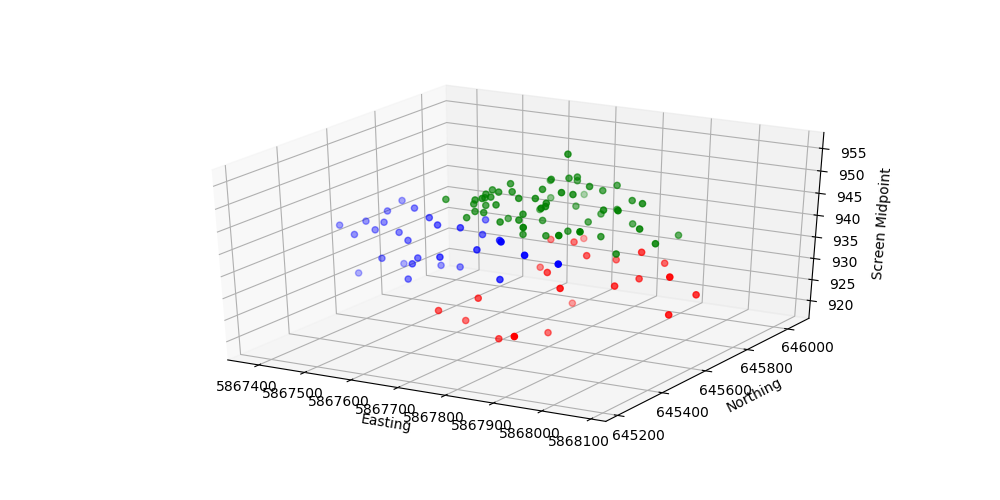

<IPython.core.display.Javascript object>


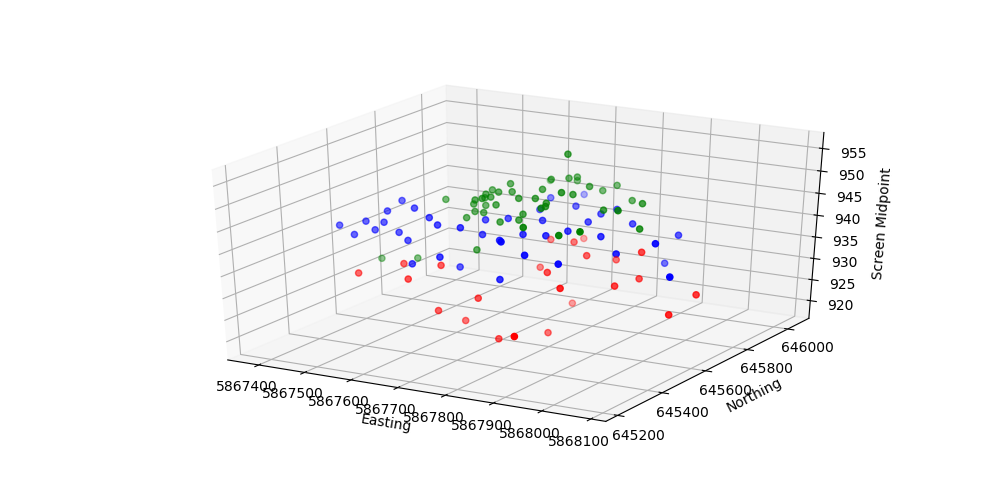

In [34]:
groupPlot(df, 0, 1, 2)
groupPlot(df2, 'Deep', 'Medial', 'Shallow')



<IPython.core.display.Javascript object>


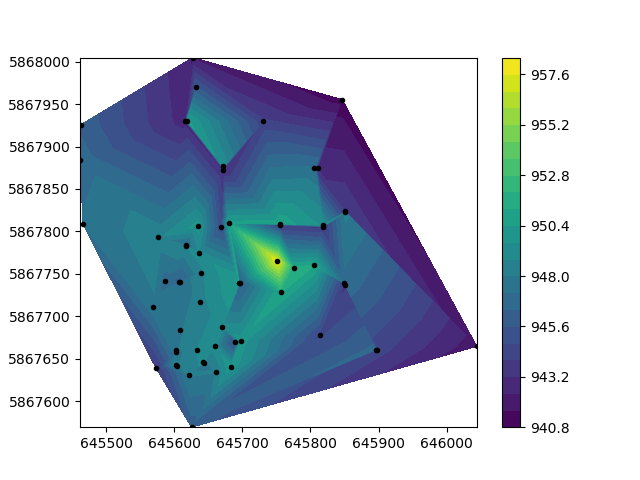

<IPython.core.display.Javascript object>


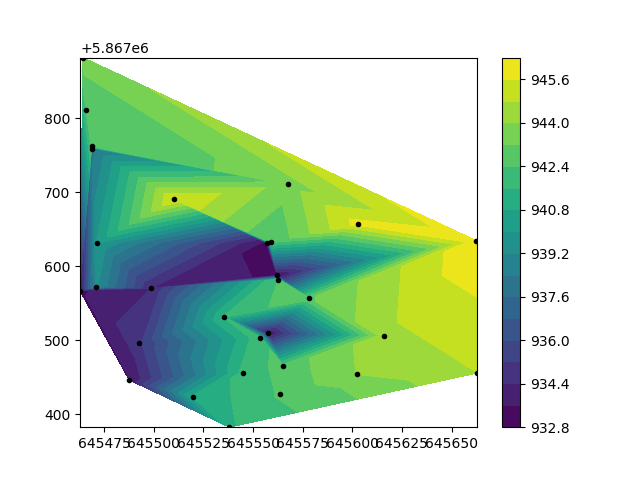

<IPython.core.display.Javascript object>


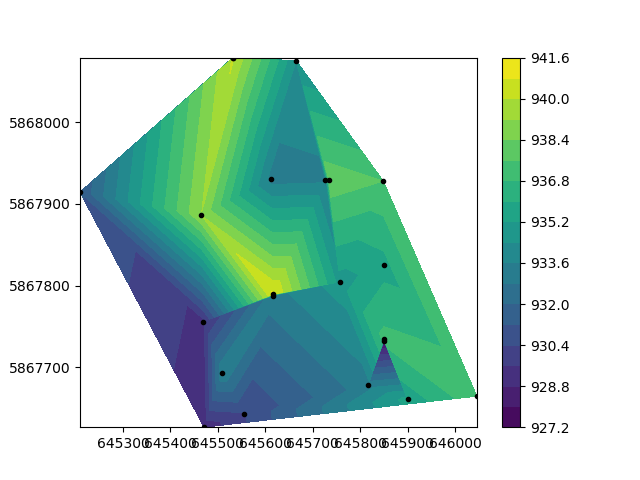

,Date,Corrected Groundwater Surface Elevation(masl),Easting(m),Northing(m),Screen Top(masl),Screen Bot(masl),Screen Mid(masl),Group
Well name,,,,,,,,
43629,Jun-16,946.19,645463.505,5867925.859,948.70,945.70,947.200,2
TH7,Jun-16,946.85,645461.893,5867883.754,946.21,945.36,945.785,2
35217,Jun-16,948.82,645617.050,5867782.746,948.80,945.80,947.300,2
35401,Jun-16,947.27,645466.248,5867809.039,947.82,944.82,946.320,2
97-21,Jun-16,947.19,645608.630,5867740.071,947.14,943.14,945.140,2


In [36]:
group1 = df[df['Group'] == 0]
group2 = df[df['Group'] == 1]
group3 = df[df['Group'] == 2]

northingSeries1 = group1['Northing(m)']

eastingSeries1 = group1['Easting(m)']

correctedGSE1 = group1['Corrected Groundwater Surface Elevation(masl)']


northingSeries2 = group2['Northing(m)']

eastingSeries2 = group2['Easting(m)']

correctedGSE2 = group2['Corrected Groundwater Surface Elevation(masl)']


northingSeries3 = group3['Northing(m)']

eastingSeries3 = group3['Easting(m)']

correctedGSE3 = group3['Corrected Groundwater Surface Elevation(masl)']

plt.figure()
plt.tricontourf(eastingSeries3.values, northingSeries3.values, correctedGSE3.values.astype(float), 20)
plt.plot(eastingSeries3, northingSeries3, 'k. ')
plt.colorbar()
plt.figure()

plt.tricontourf(eastingSeries2.values, northingSeries2.values, correctedGSE2.values.astype(float), 20)
plt.plot(eastingSeries2, northingSeries2, 'k. ')
plt.colorbar()
plt.figure()

plt.tricontourf(eastingSeries1.values, northingSeries1.values, correctedGSE1.values.astype(float), 20)
plt.plot(eastingSeries1, northingSeries1, 'k. ')
plt.colorbar()

plt.show()

df.head()